In [147]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Set font size for plots
rcParams.update({'font.size': 18})

In [148]:
# Define grid spacing and create 2D grid of x and y values
h = 0.5
a = np.arange(-6, 6 + h, h)
b = np.arange(-6, 6 + h, h)
X, Y = np.meshgrid(a, b)

## Example 1: Simple gradient descent
(`np.gradient()` is not used. Hard coding gradients here)


In [149]:
import numpy as np

# Initialize arrays for x, y, and the function values
num_of_step = 100 
x = np.zeros(num_of_step)
y = np.zeros(num_of_step)
f = np.zeros(num_of_step)

# Set initial values for x and y
x[0] = 6
y[0] = 5

# Compute initial function value
f[0] = x[0]**2 + 3 * y[0]**2

# Set the learning rate
learning_rate = 0.01

# Perform gradient descent iterations
for j in range(len(x) - 1):
    # Calculate gradients
    dfdx = 2 * x[j]
    dfdy = 6 * y[j]
    
    # Update x, y values using gradient descent formula
    x[j + 1] = x[j] - learning_rate * dfdx
    y[j + 1] = y[j] - learning_rate * dfdy
    
    # Compute the corresponding function value
    f[j + 1] = x[j + 1]**2 + 3 * y[j + 1]**2
    
    # Check for convergence
    if np.abs(f[j + 1] - f[j]) < 10**(-6):
        # Trim arrays if convergence criteria met
        x = x[:j + 2]
        y = y[:j + 2]
        f = f[:j + 2]
        break

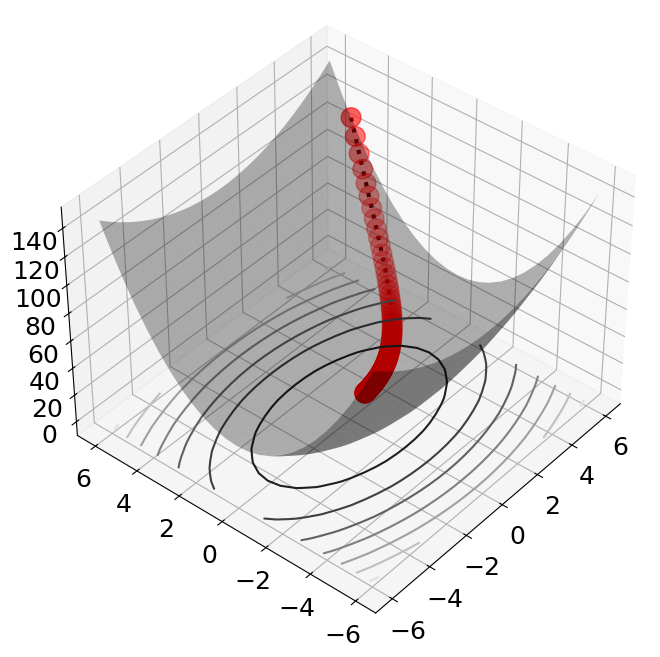

In [150]:
Fquad = np.power(X, 2) + 3 * np.power(Y, 2)

# Plot the results using 3D surface plot, scatter points, and contours
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Fquad, linewidth=0, color='k', alpha=0.3)
ax.scatter(x, y, f, 'o', color='r', s=200)
ax.plot(x, y, f, ':', color='k', linewidth=3)
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
ax.view_init(elev=40, azim=-140)
plt.show()

## Another trial

In [151]:
import numpy as np

# Create a grid of x and y values
x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_values, y_values)

# Compute the function values at each point in the grid
F = X**2 + 3*Y**2

In [152]:
# Compute the gradient of F at each point in the grid
dFx, dFy = np.gradient(F, np.diff(x_values).mean(), np.diff(y_values).mean())

In [153]:
# another trial

# Set the learning rate
learning_rate = 0.01

# Initialize arrays for x, y, and the function values
num_of_steps = 100 
x = np.zeros(num_of_steps)
y = np.zeros(num_of_steps)
f = np.zeros(num_of_steps)

# Set initial values for x and y
x[0] = 6
y[0] = 5

# Compute initial function value
f[0] = x[0]**2 + 3 * y[0]**2

# Perform gradient descent iterations
for j in range(num_of_steps - 1):
    # Find the closest index of x[j] and y[j] in the x_values and y_values
    idx_x = (np.abs(x_values - x[j])).argmin()
    idx_y = (np.abs(y_values - y[j])).argmin()
    
    # Update x, y values using gradient descent formula
    x[j + 1] = x[j] - learning_rate * dFx[idx_y, idx_x]
    y[j + 1] = y[j] - learning_rate * dFy[idx_y, idx_x]
    
    # Compute the corresponding function value
    f[j + 1] = x[j + 1]**2 + 3 * y[j + 1]**2
    
    # Check for convergence
    if np.abs(f[j + 1] - f[j]) < 10**(-6):
        # Trim arrays if convergence criteria met
        x = x[:j + 2]
        y = y[:j + 2]
        f = f[:j + 2]
        break

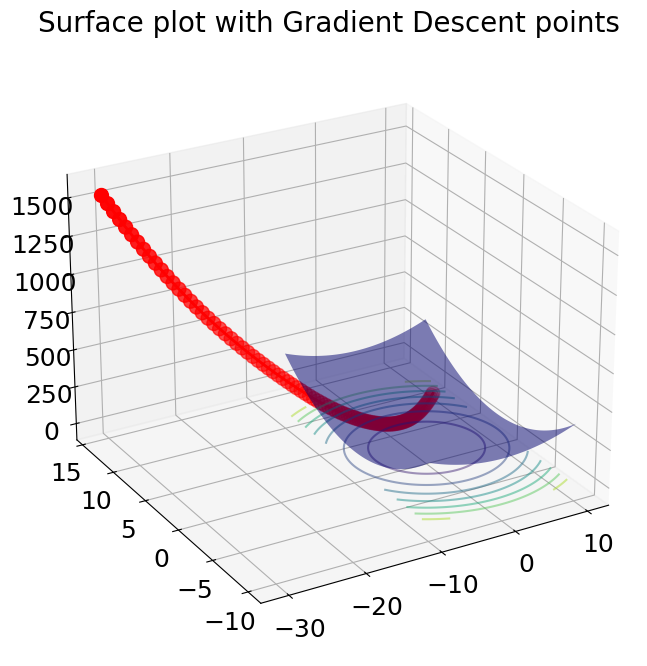

In [154]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for plotting
fig = plt.figure(figsize=(10, 8))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, F, color='b', alpha=0.5, rstride=100, cstride=100)

# Plot the points obtained from gradient descent in red
ax.scatter(x, y, f, color='r', s=100)

# Connect the points obtained from gradient descent with a line
ax.plot(x, y, f, color='r', linewidth=2)

# Add a colorbar and title
ax.set_title('Surface plot with Gradient Descent points', fontsize=20)

# Set viewpoint
ax.view_init(elev=25, azim=-120)

# Plot contour plot at the bottom
ax.contour(X, Y, F, zdir='z', offset=np.min(F), cmap='viridis', alpha=0.5)

# Show the plot
plt.show()

## Computing the gradient descent with fmin
(also shows the scenario when local maxima affect learning result)

In [155]:
## Computing the gradient descent with fmin

# Define a grid of points using np.arange and create a meshgrid
h = 0.1
x = np.arange(-6, 6 + h, h)
y = np.arange(-6, 6 + h, h)
X, Y = np.meshgrid(x, y)

# Define a complicated 2D function F in terms of X and Y
F1 = 1.5 - 1.6 * np.exp(-0.05 * (3 * np.power(X + 3, 2) + np.power(Y + 3, 2)))
F = F1 + 0.5 - np.exp(-0.1 * (3 * np.power(X - 3, 2) + np.power(Y - 3, 2)))

# Compute gradients of the function using np.gradient
dFy, dFx = np.gradient(F, h, h)

# Create spline interpolations for F, dFx, and dFy
F_interp = scipy.interpolate.RectBivariateSpline(x, y, F)
dFx_interp = scipy.interpolate.RectBivariateSpline(x, y, dFx)
dFy_interp = scipy.interpolate.RectBivariateSpline(x, y, dFy)

# Define a function to perform line search during gradient descent
def delsearch(Del, t):
    x, y, dfx, dfy, X, Y, F = t
    x0 = x - Del * dfx
    y0 = y - Del * dfy
    return F_interp(x0, y0)

# Initialize arrays for multiple starting points
x0 = np.array([4, 0, -5])
y0 = np.array([0, -5, 2])

# Perform gradient descent using scipy.optimize.fmin for each starting point
for jj in range(3):
    x = np.zeros(10)
    y = np.zeros(10)
    f = np.zeros(10)
    
    # Set initial values for x, y, and compute initial function value
    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0], y[0])
    
    # Compute initial gradients
    dfx = dFx_interp(x[0], y[0])
    dfy = dFy_interp(x[0], y[0])
    
    # Perform gradient descent iterations with line search
    for j in range(len(x) - 1):
        t = x[j], y[j], dfx, dfy, X, Y, F
        # Use scipy.optimize.fmin to find the optimal step size (Del)
        Del = scipy.optimize.fmin(delsearch, 0.2, args=(t,), disp=False)
        
        # Update x, y values using gradient descent formula
        x[j + 1] = x[j] - Del * dfx
        y[j + 1] = y[j] - Del * dfy
        
        # Compute the corresponding function value and gradients
        f[j + 1] = F_interp(x[j + 1], y[j + 1])
        dfx = dFx_interp(x[j + 1], y[j + 1])
        dfy = dFy_interp(x[j + 1], y[j + 1])
        
        # Check for convergence
        if np.abs(f[j + 1] - f[j]) < 10**(-6):
            # Trim arrays if convergence criteria met
            x = x[:j + 2]
            y = y[:j + 2]
            f = f[:j + 2]
            break
    
    # Store results based on different starting points
    if jj == 0:
        x1 = x
        y1 = y
        f1 = f
    if jj == 1:
        x2 = x
        y2 = y
        f2 = f
    if jj == 2:
        x3 = x
        y3 = y
        f3 = f

C:\Users\kinla\AppData\Local\Temp\ipykernel_29900\272436805.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[0] = F_interp(x[0], y[0])
C:\Users\kinla\AppData\Local\Temp\ipykernel_29900\272436805.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[j + 1] = x[j] - Del * dfx
C:\Users\kinla\AppData\Local\Temp\ipykernel_29900\272436805.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[j + 1] = y[j] - Del * dfy
C:\Users\kinla\AppData\Local\Temp\ipykernel_29

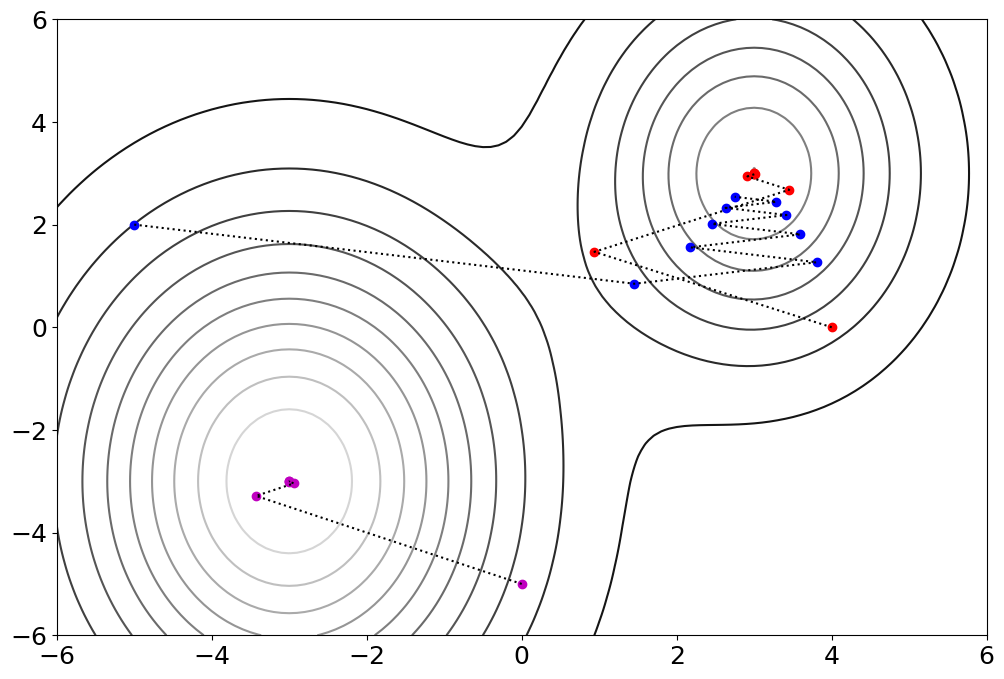

In [156]:
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

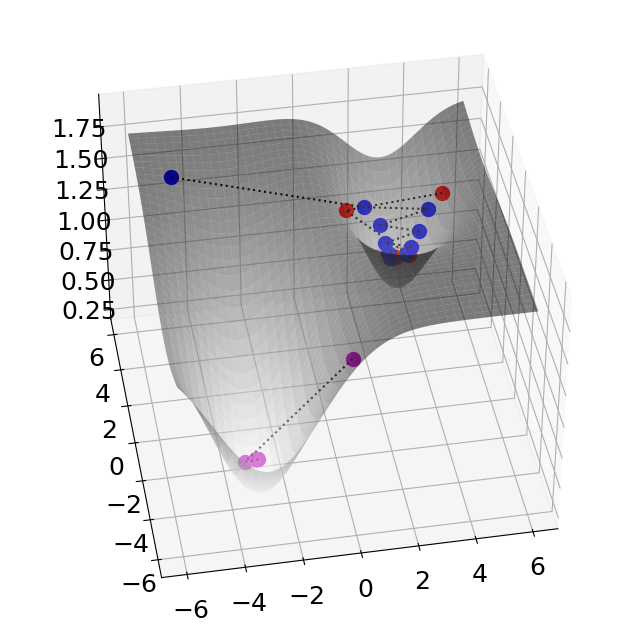

In [157]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',markersize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',markersize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',markersize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

In [158]:
## Alternating Descent

h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)

x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

for jj in range(3):
    xa = np.zeros(5)
    ya = np.zeros(5)
    f = np.zeros(5)
    xa[0] = x0[jj]
    ya[0] = y0[jj]
    f[0] = F_interp(xa[0],ya[0])
    
    fx = F_interp(xa[0],y)
    xa[1]=xa[0]
    ya[1]=y[np.argmin(fx)]
    
    fy = F_interp(x,ya[1])
    ya[2]=ya[1]
    xa[2]=x[np.argmin(fy)]
    
    fx = F_interp(xa[2],y)
    xa[3]=xa[2]
    ya[3]=y[np.argmin(fx)]
    
    fy = F_interp(x,ya[3])
    ya[4]=ya[3]
    xa[4]=x[np.argmin(fy)]
    
    for j in range(1,5):
        f[j] = F_interp(xa[j],ya[j])
    
    if jj == 0:
        x1 = xa
        y1 = ya
        f1 = f
    if jj == 1:
        x2 = xa
        y2 = ya
        f2 = f
    if jj == 2:
        x3 = xa
        y3 = ya
        f3 = f

C:\Users\kinla\AppData\Local\Temp\ipykernel_29900\1546792340.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[0] = F_interp(xa[0],ya[0])
C:\Users\kinla\AppData\Local\Temp\ipykernel_29900\1546792340.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[j] = F_interp(xa[j],ya[j])


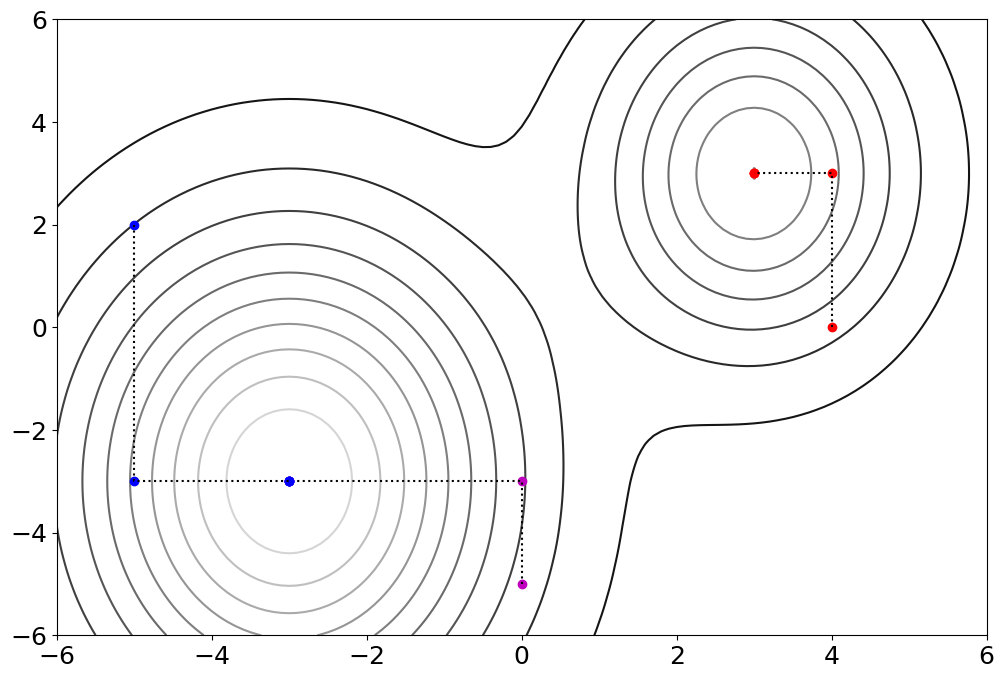

In [159]:
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

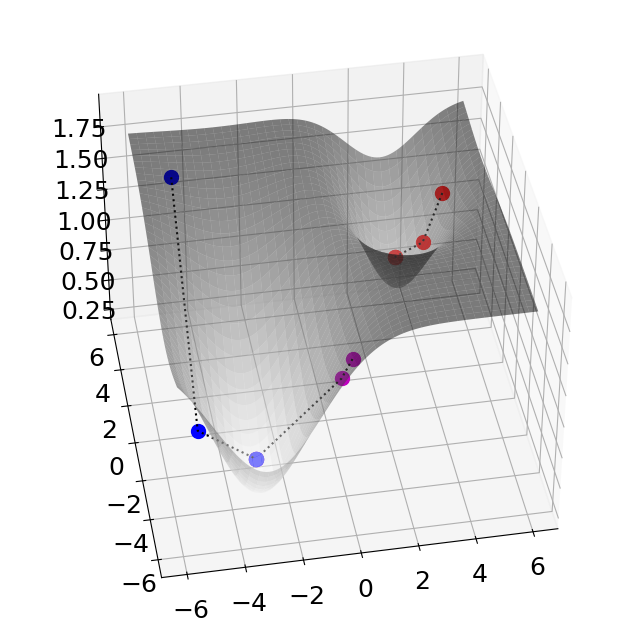

In [160]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',markersize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',markersize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',markersize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()